In [1]:
a = 2 +3 
a

5

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import io
import requests
import math
import scipy.stats as stats
%matplotlib inline
import os 
import requests
import json
from bs4 import BeautifulSoup
import boto3
import yaml



In [4]:
akam = pd.read_csv("midtermdata/AKAM.csv")
goog = pd.read_csv("midtermdata/GOOG.csv")
mck = pd.read_csv("midtermdata/MCK.csv")
unp = pd.read_csv("midtermdata/UNP.csv")

companies = {"akam": akam, "goog": goog, "mck": mck, "unp": unp}

In [18]:
companies

{'akam':             Date   Open   High    Low  Close   Volume  Dividends  Stock Splits
 0     2017-01-03  67.27  68.37  67.11  67.57  1077400        0.0           0.0
 1     2017-01-04  67.51  68.47  67.19  68.33  1174300        0.0           0.0
 2     2017-01-05  68.12  69.75  68.12  69.55  1779800        0.0           0.0
 3     2017-01-06  69.38  70.51  68.92  69.79  1967300        0.0           0.0
 4     2017-01-09  69.74  70.29  69.70  70.00  1550300        0.0           0.0
 ...          ...    ...    ...    ...    ...      ...        ...           ...
 1505  2022-12-23  82.55  83.47  82.02  83.16   813800        0.0           0.0
 1506  2022-12-27  83.18  83.89  82.64  83.50   967300        0.0           0.0
 1507  2022-12-28  83.44  84.08  83.29  83.50   799100        0.0           0.0
 1508  2022-12-29  83.59  84.78  83.59  84.70   961300        0.0           0.0
 1509  2022-12-30  83.93  84.89  83.61  84.30   675000        0.0           0.0
 
 [1510 rows x 8 columns],
 'go

In [5]:
#Part 1 - 1
for firm, df in companies.items():
    if sum(df["Close"] == df["Open"]) == df.shape[0]:
            print(f"the company {firm} has same value in Open and Close collums")
    else: print(f"no company has same value in Open and Close collums")
    break

no company has same value in Open and Close collums


In [53]:
akam['Close'].min()

44.91

In [6]:
#Part 1 - 2
for firm, df in companies.items():
    print(f"the highest price for company {firm} is {df['Close'].max()}")
    print(f"the lowest price for company {firm} is {df['Close'].min()}")

the highest price for company akam is 121.92
the lowest price for company akam is 44.91
the highest price for company goog is 150.34
the lowest price for company goog is 39.211
the highest price for company mck is 393.339
the lowest price for company mck is 103.273
the highest price for company unp is 260.918
the lowest price for company unp is 86.221


In [19]:
#Part 1 - 3
for firm, df in companies.items():
    df["LogR"] = np.log(df["Close"]) - np.log(df["Close"].shift(1))
    print(f"the min Log Return for {firm}  is {df['LogR'].min()}")
    print(f"the max Log Return for {firm}  is {df['LogR'].max()}")
    print(f"the mean Log Return for {firm}  is {np.mean(df['LogR'])}")
    print(f"the median Log Return for {firm}  is {np.median(df['LogR'])}")


the min Log Return for akam  is -0.1686553660301402
the max Log Return for akam  is 0.15633546767958073
the mean Log Return for akam  is 0.00014659891812042846
the median Log Return for akam  is nan
the min Log Return for goog  is -0.11765976301412451
the max Log Return for goog  is 0.09937989261294522
the mean Log Return for goog  is 0.0005395573984125371
the median Log Return for goog  is nan
the min Log Return for mck  is -0.08900599770558149
the max Log Return for mck  is 0.13974454336760456
the mean Log Return for mck  is 0.0006562615887491288
the median Log Return for mck  is nan
the min Log Return for unp  is -0.13965806779576262
the max Log Return for unp  is 0.12225152145044849
the mean Log Return for unp  is 0.000550884837329211
the median Log Return for unp  is nan


In [21]:

goog['LogR'].min()

-0.11765976301412451

In [23]:
#Part 1 - 4
for firm, df in companies.items():
    maxgain = df.loc[df['LogR'] == df["LogR"].max(), 'Date']
    maxloss = df.loc[df['LogR'] == df["LogR"].min(), 'Date']
    print(f"the max gain for {firm}  was  {maxgain[maxgain.index[0]]}")
    print(f"the max loss for {firm}  was  {maxloss[maxloss.index[0]]}")

the max gain for akam  was  2018-10-30
the max loss for akam  was  2017-05-03
the max gain for goog  was  2019-07-26
the max loss for goog  was  2020-03-16
the max gain for mck  was  2020-03-17
the max loss for mck  was  2020-03-16
the max gain for unp  was  2020-03-24
the max loss for unp  was  2020-03-16


In [78]:
unp.loc[unp['LogR'] == unp["LogR"].min(), 'Date']

804    2020-03-16
Name: Date, dtype: object

In [91]:
akam.loc[unp['LogR'] == unp["LogR"].min(), 'LogR']
# je to vse negativni hura

804   -0.029595
Name: LogR, dtype: float64

In [ ]:
#Part 1 - 5



In [25]:
#Part 1 - 6
totalR = {}
for firm,df in companies.items():
    df["cumsum"] = df["Close"].agg(np.cumsum)
    first = df["cumsum"][0]
    last = df["cumsum"][len(df) - 1]
    rozdil = last - first
    totalR.update({firm:rozdil})

output = pd.DataFrame(totalR, index=["totalreturn"]).T
output


C:\Users\risad\AppData\Local\Temp\ipykernel_26452\4290958899.py:4: FutureWarning: The provided callable <function cumsum at 0x000002866CEBFF60> is currently using Series.cumsum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "cumsum" instead.
  df["cumsum"] = df["Close"].agg(np.cumsum)


,totalreturn
akam,130155.090
goog,119467.493
mck,268674.231
unp,239476.835


In [ ]:
#Part 1 - 7



In [27]:
akam["LogR"]

0            NaN
1       0.011185
2       0.017697
3       0.003445
4       0.003005
          ...   
1505    0.005305
1506    0.004080
1507    0.000000
1508    0.014269
1509   -0.004734
Name: LogR, Length: 1510, dtype: float64

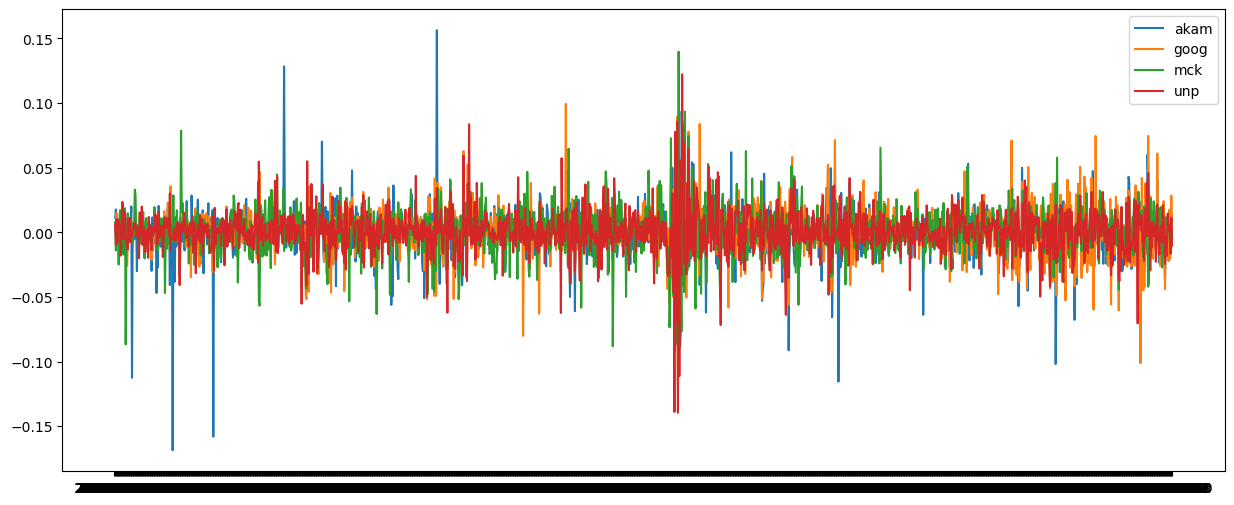

In [34]:
#Part 1 - 8 A
plt.subplots(1,1, figsize = (15,6))
for firm, df in companies.items():
    plt.plot(df["Date"],df["LogR"], label = firm)
plt.legend()



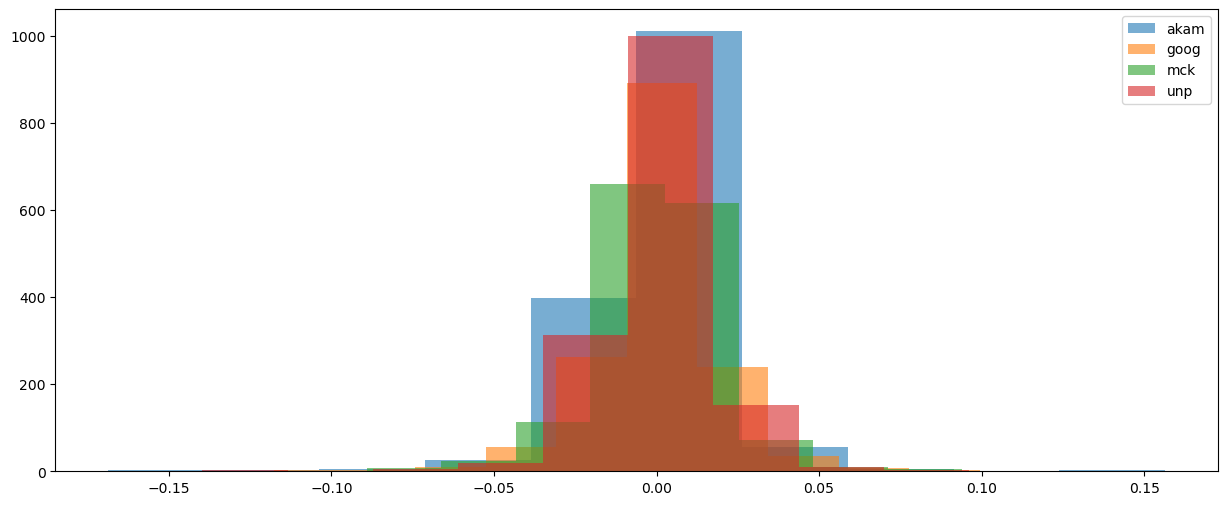

In [42]:
#Part 1 - 8 B
plt.subplots(1,1, figsize = (15,6))
for firm, df in companies.items():
    plt.hist(df["LogR"], label = firm, bins= 10, alpha = 0.6)
plt.legend()

In [44]:
#Part 2 - 1
data = pd.read_csv("companies_no_subindustry (1).csv")


In [48]:
data.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [51]:
data_notfilled = data["included"].isnull().sum()
print(f"{data_notfilled} companies did NOT fill in")

45 companies did NOT fill in


In [54]:
#Part 2 - 2
data = data.dropna(subset="included")
today = datetime.datetime.today()
year = today.year
oldest = data.loc[data["Founded"] == data["Founded"].min(), "Symbol"]
youngest = data.loc[data["Founded"] == data["Founded"].max(), "Symbol"]
print(f"the oldest company is {oldest[oldest.index[0]]}")
print(f"the youngest company is {youngest[youngest.index[0]]}")

the oldest company is BK
the youngest company is WBD


([<matplotlib.patches.Wedge at 0x28679f01430>,
 [Text(0.9824937293546878, 0.4946777453845257, 'Information Technology'),
  Text(0.2025607676993733, 1.0811887602953707, 'Industrials'),
  Text(-0.6908833028272607, 0.8559674420645308, 'Health Care'),
  Text(-1.0941825695808445, 0.11298010632611698, 'Financials'),
  Text(-0.8881413728612144, -0.6490030060116807, 'Consumer Discretionary'),
  Text(-0.38408928255840796, -1.0307644847508899, 'Consumer Staples'),
  Text(0.08291962850581176, -1.0968702453838641, 'Real Estate'),
  Text(0.4879268426565808, -0.985863781774734, 'Materials'),
  Text(0.7857791165518135, -0.7697734601758179, 'Communication Services'),
  Text(0.9858637303813442, -0.48792694649771123, 'Utilities'),
  Text(1.0874987680638741, -0.16536755866721908, 'Energy')])

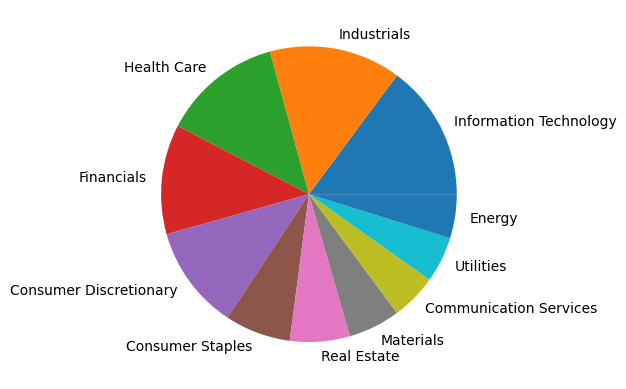

In [61]:
#Part 2 - 3
sector = data["GICS_Sector"].value_counts().reset_index()
plt.pie(sector["count"], labels= sector["GICS_Sector"])

In [69]:
data[["hq"]]

,hq
0,"Saint Paul, Minnesota"
1,"Milwaukee, Wisconsin"
2,"North Chicago, Illinois"
3,"North Chicago, Illinois"
4,"Danvers, Massachusetts"
...,...
498,"Louisville, Kentucky"
499,"Lincolnshire, Illinois"
500,"Warsaw, Indiana"
501,"Salt Lake City, Utah"


C:\Users\risad\AppData\Local\Temp\ipykernel_26452\1305923286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["state"] = data["hq"].apply(lambda x: x.split(",")[-1])


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, ' California'),
  Text(1, 0, ' New York'),
  Text(2, 0, ' Texas'),
  Text(3, 0, ' Illinois'),
  Text(4, 0, ' Pennsylvania'),
  Text(5, 0, ' Massachusetts'),
  Text(6, 0, ' Ohio'),
  Text(7, 0, ' North Carolina'),
  Text(8, 0, ' Georgia'),
  Text(9, 0, ' New Jersey'),
  Text(10, 0, ' Virginia'),
  Text(11, 0, ' Florida'),
  Text(12, 0, ' Minnesota'),
  Text(13, 0, ' Connecticut'),
  Text(14, 0, ' Washington'),
  Text(15, 0, ' Michigan'),
  Text(16, 0, ' Tennessee'),
  Text(17, 0, ' Colorado'),
  Text(18, 0, ' Ireland'),
  Text(19, 0, ' Missouri'),
  Text(20, 0, ' Indiana'),
  Text(21, 0, ' Wisconsin'),
  Text(22, 0, ' Arizona'),
  Text(23, 0, ' Maryland'),
  Text(24, 0, ' Nevada'),
  Text(25, 0

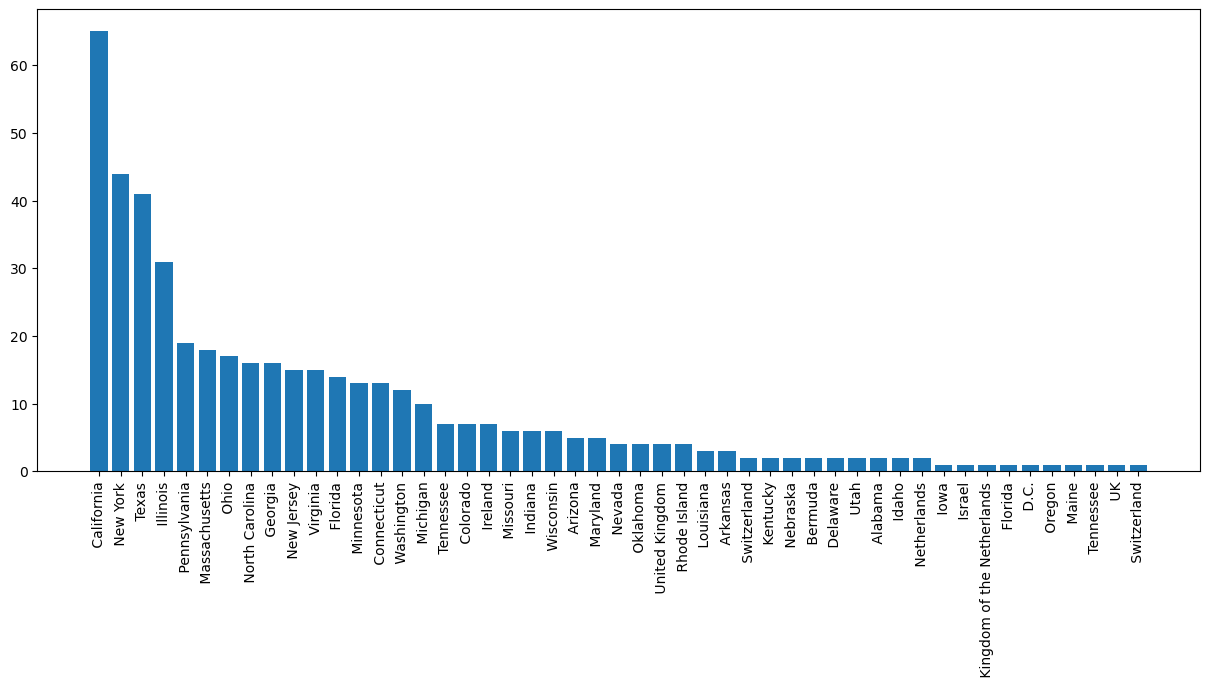

In [77]:
#Part 2 - 4
data["state"] = data["hq"].apply(lambda x: x.split(",")[-1])
states = data["state"].value_counts().reset_index()
plt.subplots(1,1, figsize = (15,6))
plt.bar(states["state"], states["count"])
plt.xticks(rotation = 90)

In [81]:
#Part 2 - 5
data2 = pd.read_csv("companies_subindustry.csv")
data2

,Symbol,subindustry
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment
...,...,...
498,YUM,Restaurants
499,ZBRA,Electronic Equipment & Instruments
500,ZBH,Health Care Equipment
501,ZION,Regional Banks


In [87]:
#GICS_Sector
data2 = data2.rename(columns = {
    'subindustry' : 'GICS_Sector'
})

In [89]:
data2

,Symbol,GICS_Sector
0,MMM,Industrial Conglomerates
1,AOS,Building Products
2,ABT,Health Care Equipment
3,ABBV,Pharmaceuticals
4,ABMD,Health Care Equipment
...,...,...
498,YUM,Restaurants
499,ZBRA,Electronic Equipment & Instruments
500,ZBH,Health Care Equipment
501,ZION,Regional Banks


In [ ]:
data3 = 